Detected License Plate Number: —



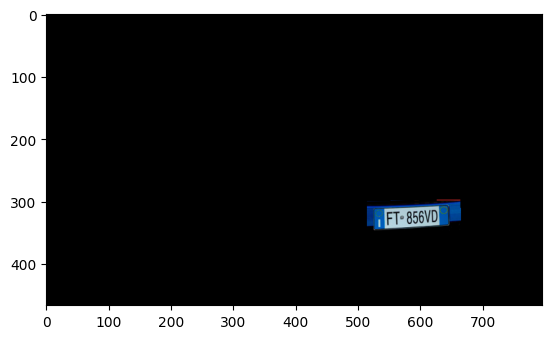

In [4]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt


image = cv2.imread("G:\jupyternotebook/Result.png")


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 100, 200)


contours, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

license_plate_contour = None


for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        license_plate_contour = approx
        break


if license_plate_contour is not None:
    mask = np.zeros(gray.shape, dtype=np.uint8)
    new_image = cv2.drawContours(mask, [license_plate_contour], 0, 255, -1)
    extracted_plate = cv2.bitwise_and(image, image, mask=mask)

    
    plate_gray = cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2GRAY)
    _, plate_thresh = cv2.threshold(plate_gray, 150, 255, cv2.THRESH_BINARY)

    
    text = pytesseract.image_to_string(plate_thresh, config='--psm 8')
    print("Detected License Plate Number:", text)


plt.imshow(cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2RGB))
plt.show()
